<a href="https://colab.research.google.com/github/ZekiahVirella/Predicting-Traffic/blob/main/Data_Programming_Project_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [ ]:
import pandas as pd
import numpy as np

sry = pd.read_csv("summary_to_publish.csv", header = 0)
tra = pd.read_csv("trajectories_to_publish.csv", header = 0)

sry

,trip_id,driver_id,date,duration_seconds,distance_meters,city
0,T-1,D-1,1/30/2018,2030,28094.738610,Atlanta (GA)
1,T-2,D-1,1/4/2018,1237,30989.104100,Atlanta (GA)
2,T-3,D-1,1/21/2018,428,5943.922274,Atlanta (GA)
3,T-4,D-1,11/8/2017,1725,31447.243210,Atlanta (GA)
4,T-5,D-1,1/2/2018,1253,30887.194860,Atlanta (GA)
...,...,...,...,...,...,...
13995,T-13996,D-280,10/8/2018,1167,32779.572490,Memphis (TN)
13996,T-13997,D-280,8/6/2018,530,14227.488060,Memphis (TN)
13997,T-13998,D-280,9/20/2018,1363,36410.671820,Memphis (TN)
13998,T-13999,D-280,9/23/2018,1569,39640.255150,Memphis (TN)


In [ ]:
tra

,trip_id,timestamp,velocity_kmh,acceleration_mss,latitude,longitude,bearing
0,T-1,1/30/2018 23:56,53.0,0.56,33.927013,-84.244491,72.0
1,T-1,1/30/2018 23:56,55.0,0.56,33.927055,-84.244341,72.0
2,T-1,1/30/2018 23:56,56.0,0.28,33.927098,-84.244186,72.0
3,T-1,1/30/2018 23:56,57.0,0.28,33.927140,-84.244025,72.0
4,T-1,1/30/2018 23:56,59.0,0.56,33.927181,-84.243865,72.0
...,...,...,...,...,...,...,...
1048570,T-898,10/13/2018 15:37,62.0,-0.28,33.940083,-84.095580,282.0
1048571,T-898,10/13/2018 15:37,62.0,0.00,33.940101,-84.095773,276.0
1048572,T-898,10/13/2018 15:37,63.0,0.28,33.940111,-84.095963,270.0
1048573,T-898,10/13/2018 15:37,63.0,0.00,33.940118,-84.096158,270.0


In [ ]:
print(sry.dtypes)
print()
print()
print(tra.dtypes)

trip_id              object
driver_id            object
date                 object
duration_seconds      int64
distance_meters     float64
city                 object
dtype: object


trip_id              object
timestamp            object
velocity_kmh        float64
acceleration_mss    float64
latitude            float64
longitude           float64
bearing             float64
dtype: object


Clean data

In [ ]:
sry.replace(' ', np.nan, inplace=True)
sry.dropna(inplace=True)

tra.replace(' ', np.nan, inplace=True)
tra.dropna(inplace=True)

Preprocess Data

In [ ]:
# Remove first two characters of trip_id, convert to float
sry['trip_id'] = sry['trip_id'].astype(str).str.replace('T-', '').astype(float)

# Remove first two characters of driver_id, convert to float
sry['driver_id'] = sry['driver_id'].astype(str).str.replace('D-', '').astype(float)

# Remove first two characters of trip_id, convert to float
tra['trip_id'] = tra['trip_id'].astype(str).str.replace('T-', '').astype(float)

print(sry)
print()
print()
print(tra)

       trip_id  driver_id        date  duration_seconds  distance_meters  \
0          1.0        1.0   1/30/2018              2030     28094.738610   
1          2.0        1.0    1/4/2018              1237     30989.104100   
2          3.0        1.0   1/21/2018               428      5943.922274   
3          4.0        1.0   11/8/2017              1725     31447.243210   
4          5.0        1.0    1/2/2018              1253     30887.194860   
...        ...        ...         ...               ...              ...   
13995  13996.0      280.0   10/8/2018              1167     32779.572490   
13996  13997.0      280.0    8/6/2018               530     14227.488060   
13997  13998.0      280.0   9/20/2018              1363     36410.671820   
13998  13999.0      280.0   9/23/2018              1569     39640.255150   
13999  14000.0      280.0  10/27/2018              1332     42379.630880   

               city  
0      Atlanta (GA)  
1      Atlanta (GA)  
2      Atlanta (GA)  

Merging the DataFrames

In [ ]:
tog = pd.merge(tra, sry, on='trip_id', how='left')
tog

,trip_id,timestamp,velocity_kmh,acceleration_mss,latitude,longitude,bearing,driver_id,date,duration_seconds,distance_meters,city
0,1.0,1/30/2018 23:56,53.0,0.56,33.927013,-84.244491,72.0,1.0,1/30/2018,2030,28094.73861,Atlanta (GA)
1,1.0,1/30/2018 23:56,55.0,0.56,33.927055,-84.244341,72.0,1.0,1/30/2018,2030,28094.73861,Atlanta (GA)
2,1.0,1/30/2018 23:56,56.0,0.28,33.927098,-84.244186,72.0,1.0,1/30/2018,2030,28094.73861,Atlanta (GA)
3,1.0,1/30/2018 23:56,57.0,0.28,33.927140,-84.244025,72.0,1.0,1/30/2018,2030,28094.73861,Atlanta (GA)
4,1.0,1/30/2018 23:56,59.0,0.56,33.927181,-84.243865,72.0,1.0,1/30/2018,2030,28094.73861,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...,...,...,...
891734,898.0,10/13/2018 15:37,62.0,-0.28,33.940083,-84.095580,282.0,18.0,10/13/2018,1353,15189.58767,Atlanta (GA)
891735,898.0,10/13/2018 15:37,62.0,0.00,33.940101,-84.095773,276.0,18.0,10/13/2018,1353,15189.58767,Atlanta (GA)
891736,898.0,10/13/2018 15:37,63.0,0.28,33.940111,-84.095963,270.0,18.0,10/13/2018,1353,15189.58767,Atlanta (GA)
891737,898.0,10/13/2018 15:37,63.0,0.00,33.940118,-84.096158,270.0,18.0,10/13/2018,1353,15189.58767,Atlanta (GA)


Ethan regression

In [ ]:
from sklearn.linear_model import LinearRegression
X = np.array(tog.drop(['duration_seconds', 'trip_id', 'driver_id', 'timestamp', 'date', 'city'], axis=1))
y = np.array(tog['duration_seconds'])
reg = LinearRegression().fit(X, y)

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [-6.25839315e+00  1.24169203e+01  1.93442286e+02 -5.19257125e+02
 -1.21987065e-01  3.58776919e-02]
Intercept: -49349.27851590631


-6.25839315e+00 (velocity)
# For each 1 km/h increase in speed, duration decreases by ~6.26 seconds
1.24169203e+01 (acceleration_mss)
# For each 1 m/s² increase in acceleration, duration increases by ~12.4 seconds
1.93442286e+02 (distance_meters)
# For each 1 km (1000 meters), duration increases by ~193.4 seconds
-5.19257125e+02 (latitude)
# Higher latitudes (further north) are associated with shorter trip durations
-1.21987065e-01 (longitude)
# Westward movement very slightly decreases duration
3.58776919e-02 (bearing)
# Direction of travel has a tiny positive effect on duration

Visualization

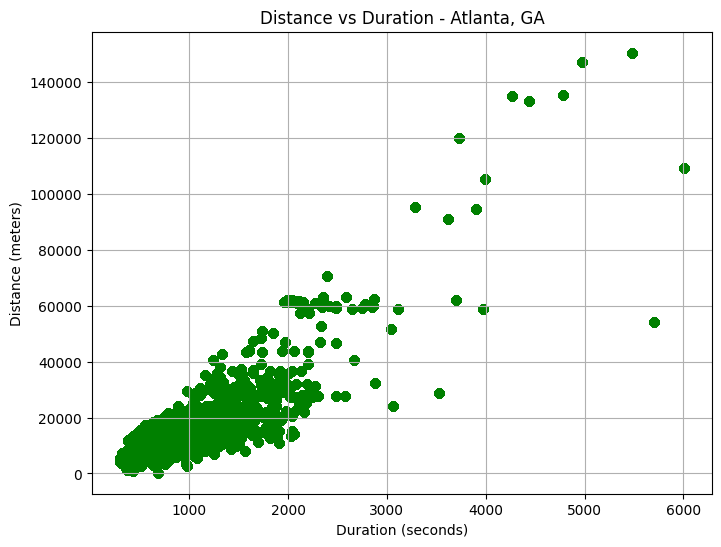

In [ ]:
import matplotlib.pyplot as plt
atlanta_tog = tog[tog['city'] == "Atlanta (GA)"]

plt.figure(figsize=(8, 6))
plt.scatter(atlanta_tog['duration_seconds'], atlanta_tog['distance_meters'], color='green')
plt.title('Distance vs Duration - Atlanta, GA')
plt.xlabel('Duration (seconds)')
plt.ylabel('Distance (meters)')
plt.grid(True)
plt.show()

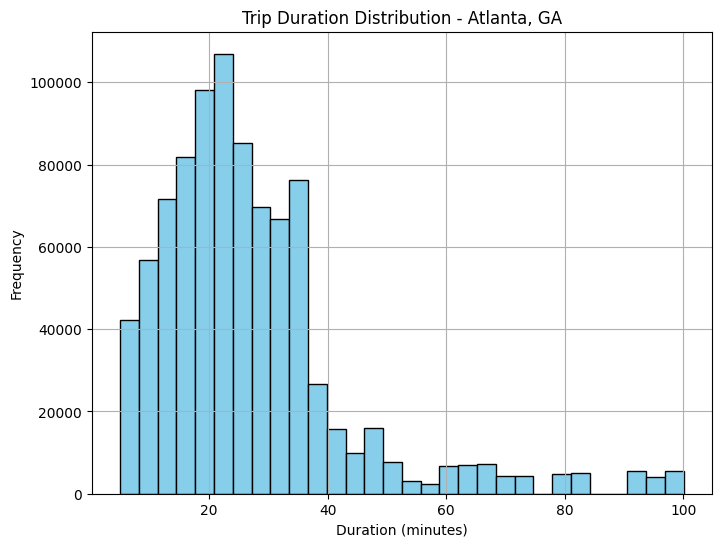

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(atlanta_tog['duration_seconds'] / 60, bins=30, color='skyblue', edgecolor='black')
plt.title('Trip Duration Distribution - Atlanta, GA')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Predictive models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Setup variables
X = tog[['velocity_kmh', 'acceleration_mss', 'distance_meters', 'bearing']].copy()
X.columns = ['A', 'B', 'C', 'D']
# Creating a series
y = pd.Series(tog['duration_seconds'], name='T')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

Predictive models results

In [ ]:
# Print result
accuracy_results = {
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
}

# Print results
print("Model Accuracies:", accuracy_results)
# Choose best
best_model = max(accuracy_results, key=accuracy_results.get)
print("Best Model:", best_model)

Model Accuracies: {'Decision Tree': 0.03902485438740765, 'Random Forest': 0.08949482455126855}
Best Model: Random Forest
